#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import wandb
import os
wandb.login(key=os.getenv("WANDB_API_KEY"))
wandb.init(project='distance_classification_project')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/vardh/.netrc
wandb: Currently logged in as: vardhaman-kalloli (vardhaman-kalloli-plaksha-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [3]:
## Reading the image plaksha_Faculty.jpg

img = cv2.imread('data/Plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face Detected" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 1  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are {}".format(len(faces_rect)), img)
wandb.log({"Total number of face detected are": len(faces_rect)})
cv2.waitKey(0)
cv2.destroyAllWindows()

2025-02-22 01:50:18.529 Python[79900:20819952] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/df/t9cn2q3s5bv415v50tksnk1c0000gn/T/org.python.python.savedState


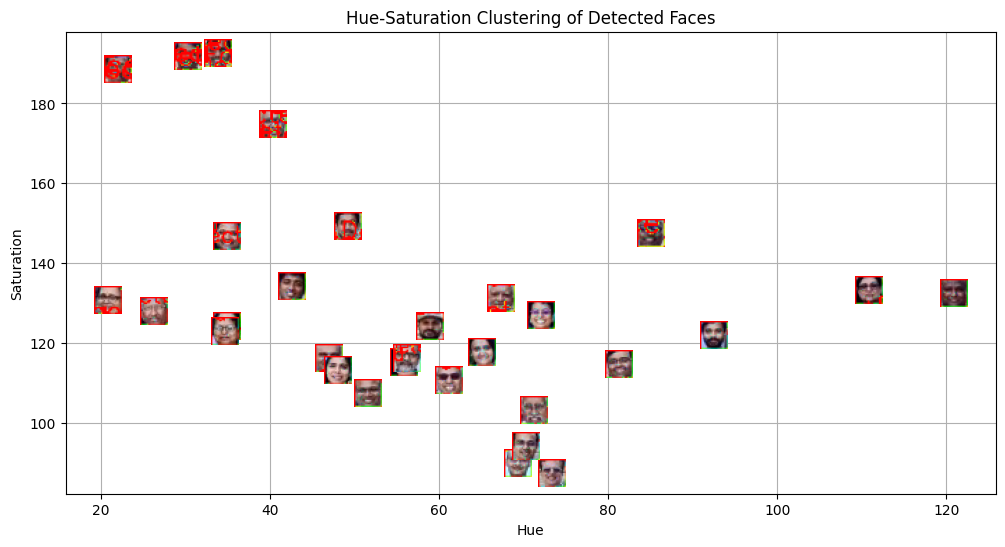

<Figure size 640x480 with 0 Axes>

In [4]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue-Saturation Clustering of Detected Faces')
plt.grid(True)
plt.show()
wandb.log({"Hue-Saturation Clustering of Detected Faces": wandb.Image(plt)})

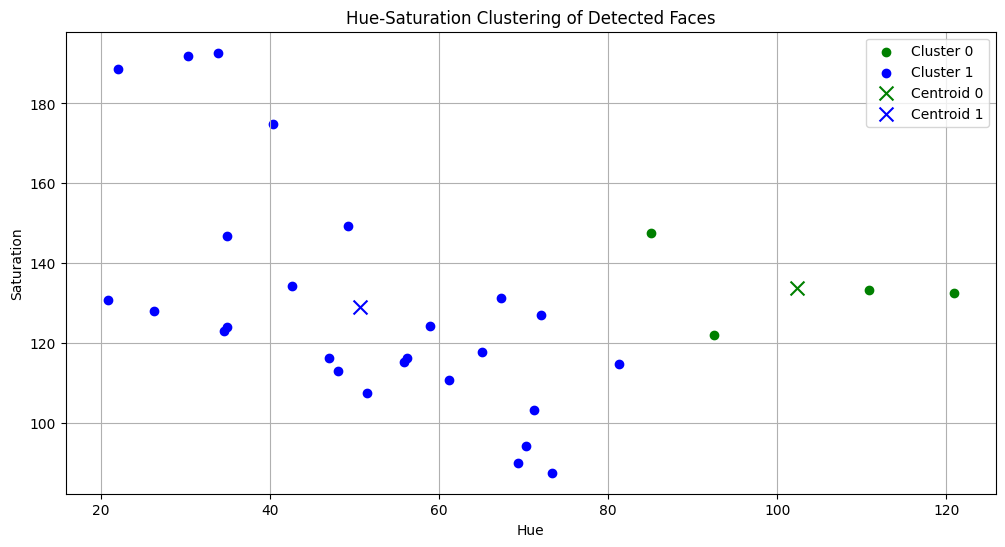

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='green', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='blue', marker='x', s=100, label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue-Saturation Clustering of Detected Faces')
plt.legend()
plt.grid(True)
plt.show()
wandb.log({"Hue-Saturation Clustering of Detected Faces, legend lables": wandb.Image(fig)})


In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("data/Dr_Shashi_Tharoor.jpg")
# Detect face in the template image after converting it to gray and store it in template_faces
grey_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(grey_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Faces", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imwrite("output/detected_faces.jpg", template_img)


wandb.log({"Detected Faces": wandb.Image(template_img)})

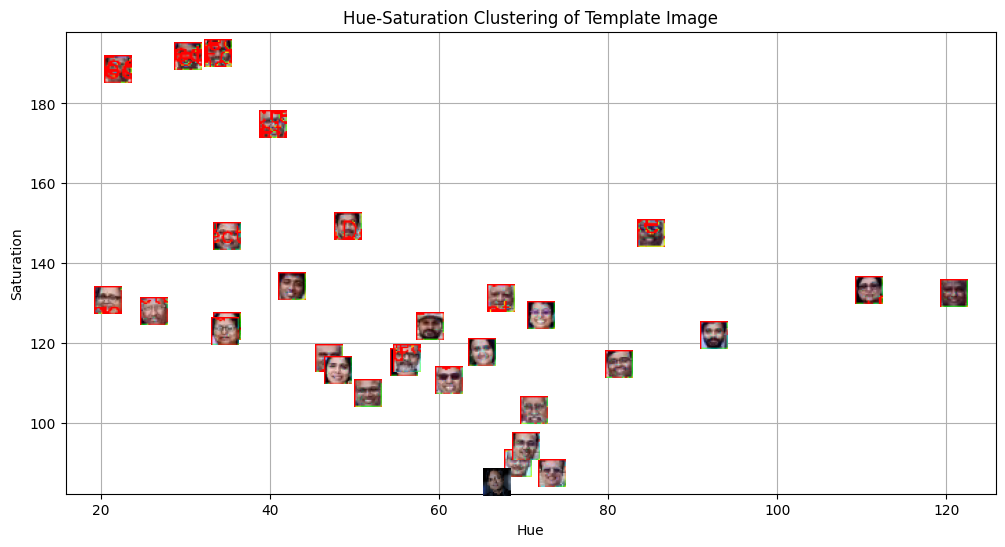

<Figure size 640x480 with 0 Axes>

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Hue-Saturation Clustering of Template Image')
plt.grid(True)
plt.show()
wandb.log({"Hue-Saturation Clustering of Template Image": wandb.Image(plt)})

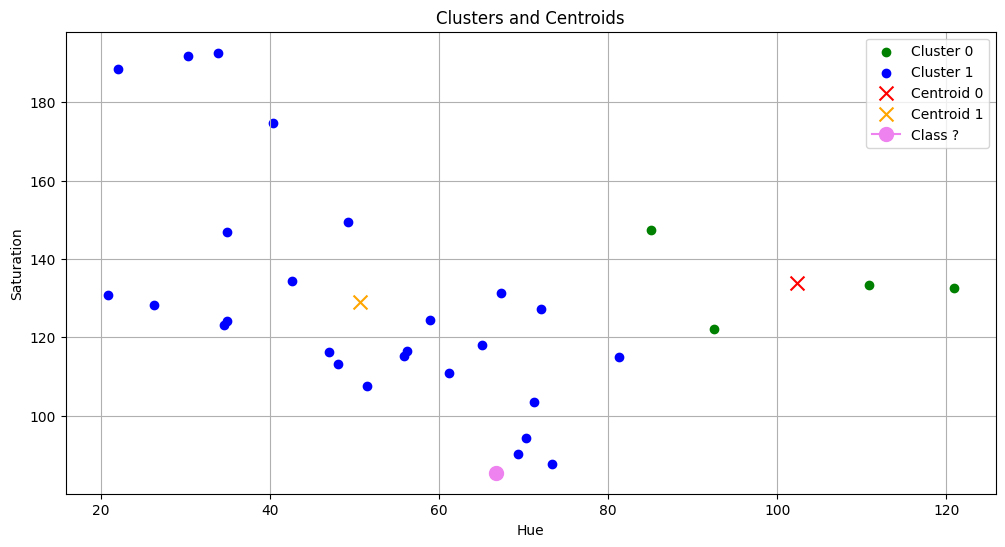

<Figure size 640x480 with 0 Axes>

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='red', s=100, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='orange', s=100, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

plt.xlabel('Hue')  # Put x label
plt.ylabel('Saturation')  # Put y label
plt.title('Clusters and Centroids')  # Put title
plt.legend()  # Add a legend
plt.grid(True)  # Add grid
plt.show()  # Show the plot
wandb.log({"Clusters and Centroids": wandb.Image(plt)})
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

The most common distance measures employed in distance-based classification techniques are:

Euclidean Distance: Calculates the straight-line distance between two points in a multi-dimensional space.

Mahalanobis Distance: Takes into account correlations between variables and scales data, commonly applied in anomaly detection.

Manhattan Distance: Calculates the sum of absolute differences between coordinates (also referred to as taxicab or city block distance).

Minkowski Distance: Generalization of both Euclidean and Manhattan distances.

Cosine Similarity: Calculates the cosine of the angle between two vectors, applied in text classification and high-dimensional space.


#### 2. What are some real-world applications of distance-based classification algorithms? 

Distance-based classification algorithms, i.e., K-Nearest Neighbors (KNN), are applied in the following applications:

Handwritten Digit Recognition: Applied in Optical Character Recognition (OCR) systems.

Medical Diagnosis: Assists in the classification of diseases according to patient symptoms.

Recommender Systems: Recommends products based on user interests by calculating similarity.

Anomaly Detection: Finds out fraudulent financial transactions.

Face Recognition: Compares face embeddings in security and surveillance systems.

#### 3. Explain various distance metrics. 

Euclidean Distance: That measures the straight-line distance between two points in space and is commonly utilized in classification and clustering.

Mahalanobis Distance: Takes into consideration correlations in data and scales features proportionally, thus being effective for anomaly detection and high-dimensional data.

Manhattan Distance: Calculates the total of absolute differences in coordinates, similar to movement in a grid-like direction.

Minkowski Distance: An extension of Manhattan and Euclidean distances, where the contribution of varying dimensions is governed by a parameter.

Cosine Similarity: Compares the angle between two vectors to compute similarity, generally applied in document and text analysis.

#### 4. What is the role of cross validation in model performance? 

Cross-validation assists in the evaluation of the model's performance by:

Avoiding overfitting through the assurance of the model generalizing well to unseen data.

Giving a more accurate estimate of accuracy by averaging over multiple splits.

Assisting in hyperparameter tuning by comparing different settings (e.g., best k value in K-NN).

Some common approaches are k-fold cross-validation, leave-one-out cross-validation (LOOCV), and stratified k-fold cross-validation.

#### 5. Explain variance and bias in terms of KNN? 

Bias: How far the model's predictions are from the true values. A high bias model (e.g., large k in K-NN) simplifies patterns too much, resulting in underfitting.

Variance: How much the model's predictions vary with different datasets. A high variance model (e.g., small k in K-NN) memorizes training data, resulting in overfitting.

Bias-Variance Tradeoff: Low k (e.g., 1-NN) → Low bias, high variance (overfits).
High k → High bias, low variance (underfits).
Optimal k trades off bias and variance for improved generalization.